# Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import csv
import matplotlib.pyplot as plt


## Imports from sklearn

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


In [6]:
# autoreload
%load_ext autoreload
%autoreload 2

## Import: This stops the annoying future warning messages

In [7]:
import warnings
warnings.filterwarnings('ignore')

# Basic EDA

## Basic info on dataset: shape, info, head, tail, describe, nunique

In [5]:
neo = pd.read_csv('../data/neo.csv')
neo.shape

(90836, 10)

In [8]:
neo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [9]:
neo.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [10]:
neo.tail()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False
90835,54205447,(2021 TW7),0.039862,0.089133,27024.455553,5.977213e+07,Earth,False,24.12,False


In [11]:
neo.describe

<bound method NDFrame.describe of              id                 name  est_diameter_min  est_diameter_max  \
0       2162635  162635 (2000 SS164)          1.198271          2.679415   
1       2277475    277475 (2005 WK4)          0.265800          0.594347   
2       2512244   512244 (2015 YE18)          0.722030          1.614507   
3       3596030          (2012 BV13)          0.096506          0.215794   
4       3667127          (2014 GE35)          0.255009          0.570217   
...         ...                  ...               ...               ...   
90831   3763337           (2016 VX1)          0.026580          0.059435   
90832   3837603           (2019 AD3)          0.016771          0.037501   
90833  54017201           (2020 JP3)          0.031956          0.071456   
90834  54115824           (2021 CN5)          0.007321          0.016370   
90835  54205447           (2021 TW7)          0.039862          0.089133   

       relative_velocity  miss_distance orbiting_body

### Provide a summary of all numerical datatypes like int or float

In [16]:
neo.describe().T

,count,mean,std,min,25%,50%,75%,max
id,90836.0,1.438288e+07,2.087202e+07,2.000433e+06,3.448110e+06,3.748362e+06,3.884023e+06,5.427591e+07
est_diameter_min,90836.0,1.274321e-01,2.985112e-01,6.089126e-04,1.925551e-02,4.836765e-02,1.434019e-01,3.789265e+01
est_diameter_max,90836.0,2.849469e-01,6.674914e-01,1.361570e-03,4.305662e-02,1.081534e-01,3.206564e-01,8.473054e+01
relative_velocity,90836.0,4.806692e+04,2.529330e+04,2.033464e+02,2.861902e+04,4.419012e+04,6.292360e+04,2.369901e+05
miss_distance,90836.0,3.706655e+07,2.235204e+07,6.745533e+03,1.721082e+07,3.784658e+07,5.654900e+07,7.479865e+07
absolute_magnitude,90836.0,2.352710e+01,2.894086e+00,9.230000e+00,2.134000e+01,2.370000e+01,2.570000e+01,3.320000e+01


In [17]:
neo.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,90836.0,NaN,NaN,NaN,14382878.05216,20872018.353893,2000433.0,3448110.0,3748362.0,3884023.0,54275914.0
name,90836,27423,469219 Kamo`oalewa (2016 HO3),43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
est_diameter_min,90836.0,NaN,NaN,NaN,0.127432,0.298511,0.000609,0.019256,0.048368,0.143402,37.89265
est_diameter_max,90836.0,NaN,NaN,NaN,0.284947,0.667491,0.001362,0.043057,0.108153,0.320656,84.730541
relative_velocity,90836.0,NaN,NaN,NaN,48066.918918,25293.296961,203.346433,28619.020645,44190.11789,62923.604633,236990.128088
miss_distance,90836.0,NaN,NaN,NaN,37066546.030422,22352040.59919,6745.532516,17210820.235765,37846579.263426,56548996.451399,74798651.452197
orbiting_body,90836,1,Earth,90836,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sentry_object,90836,1,False,90836,NaN,NaN,NaN,NaN,NaN,NaN,NaN
absolute_magnitude,90836.0,NaN,NaN,NaN,23.527103,2.894086,9.23,21.34,23.7,25.7,33.2
hazardous,90836,2,False,81996,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
neo.nunique()

id                    27423
name                  27423
est_diameter_min       1638
est_diameter_max       1638
relative_velocity     90828
miss_distance         90536
orbiting_body             1
sentry_object             1
absolute_magnitude     1638
hazardous                 2
dtype: int64

### isnull to find missing records in each column

In [13]:
neo.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

### Percent of missing values in each column

In [15]:
(neo.isnull().sum()/(len(neo)))*100

id                    0.0
name                  0.0
est_diameter_min      0.0
est_diameter_max      0.0
relative_velocity     0.0
miss_distance         0.0
orbiting_body         0.0
sentry_object         0.0
absolute_magnitude    0.0
hazardous             0.0
dtype: float64

In [54]:
neo.value_counts()

id        name                est_diameter_min  est_diameter_max  relative_velocity  miss_distance  orbiting_body  sentry_object  absolute_magnitude  hazardous  intercept
2000433   433 Eros (A898 PA)  23.043847         51.527608         15884.252623       5.468808e+07   Earth          False          10.310              False      1            1
3831182   (2018 TR)           0.021113          0.047211          67580.251365       6.304910e+07   Earth          False          25.500              False      1            1
3831167   (2018 TC)           0.012722          0.028447          21096.497062       3.055892e+05   Earth          False          26.600              False      1            1
                                                                  16528.547787       1.170378e+07   Earth          False          26.600              False      1            1
                                                                  15163.637016       4.257412e+07   Earth          False     

### Separates Numerical and Categorical variables

In [18]:
cat_cols=neo.select_dtypes(include=['object']).columns
num_cols = neo.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['name', 'orbiting_body'], dtype='object')
Numerical Variables:
['id', 'est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']


# Quick Graphs

## Correlation Matrix Raw

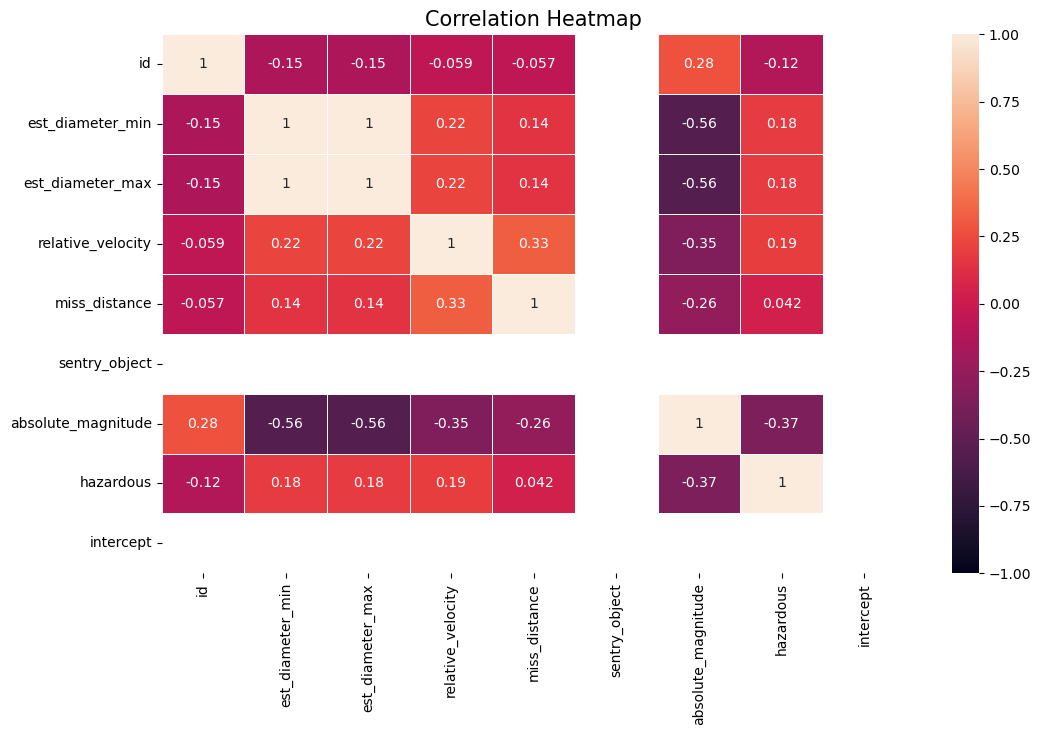

In [64]:
plt.figure(figsize = (12, 7))
sns.heatmap((neo).corr(), annot = True, linewidths=.5, vmin = -1, vmax = 1)
plt.title('Correlation Heatmap', fontsize = 15)
plt.show()

## SNS pairplot

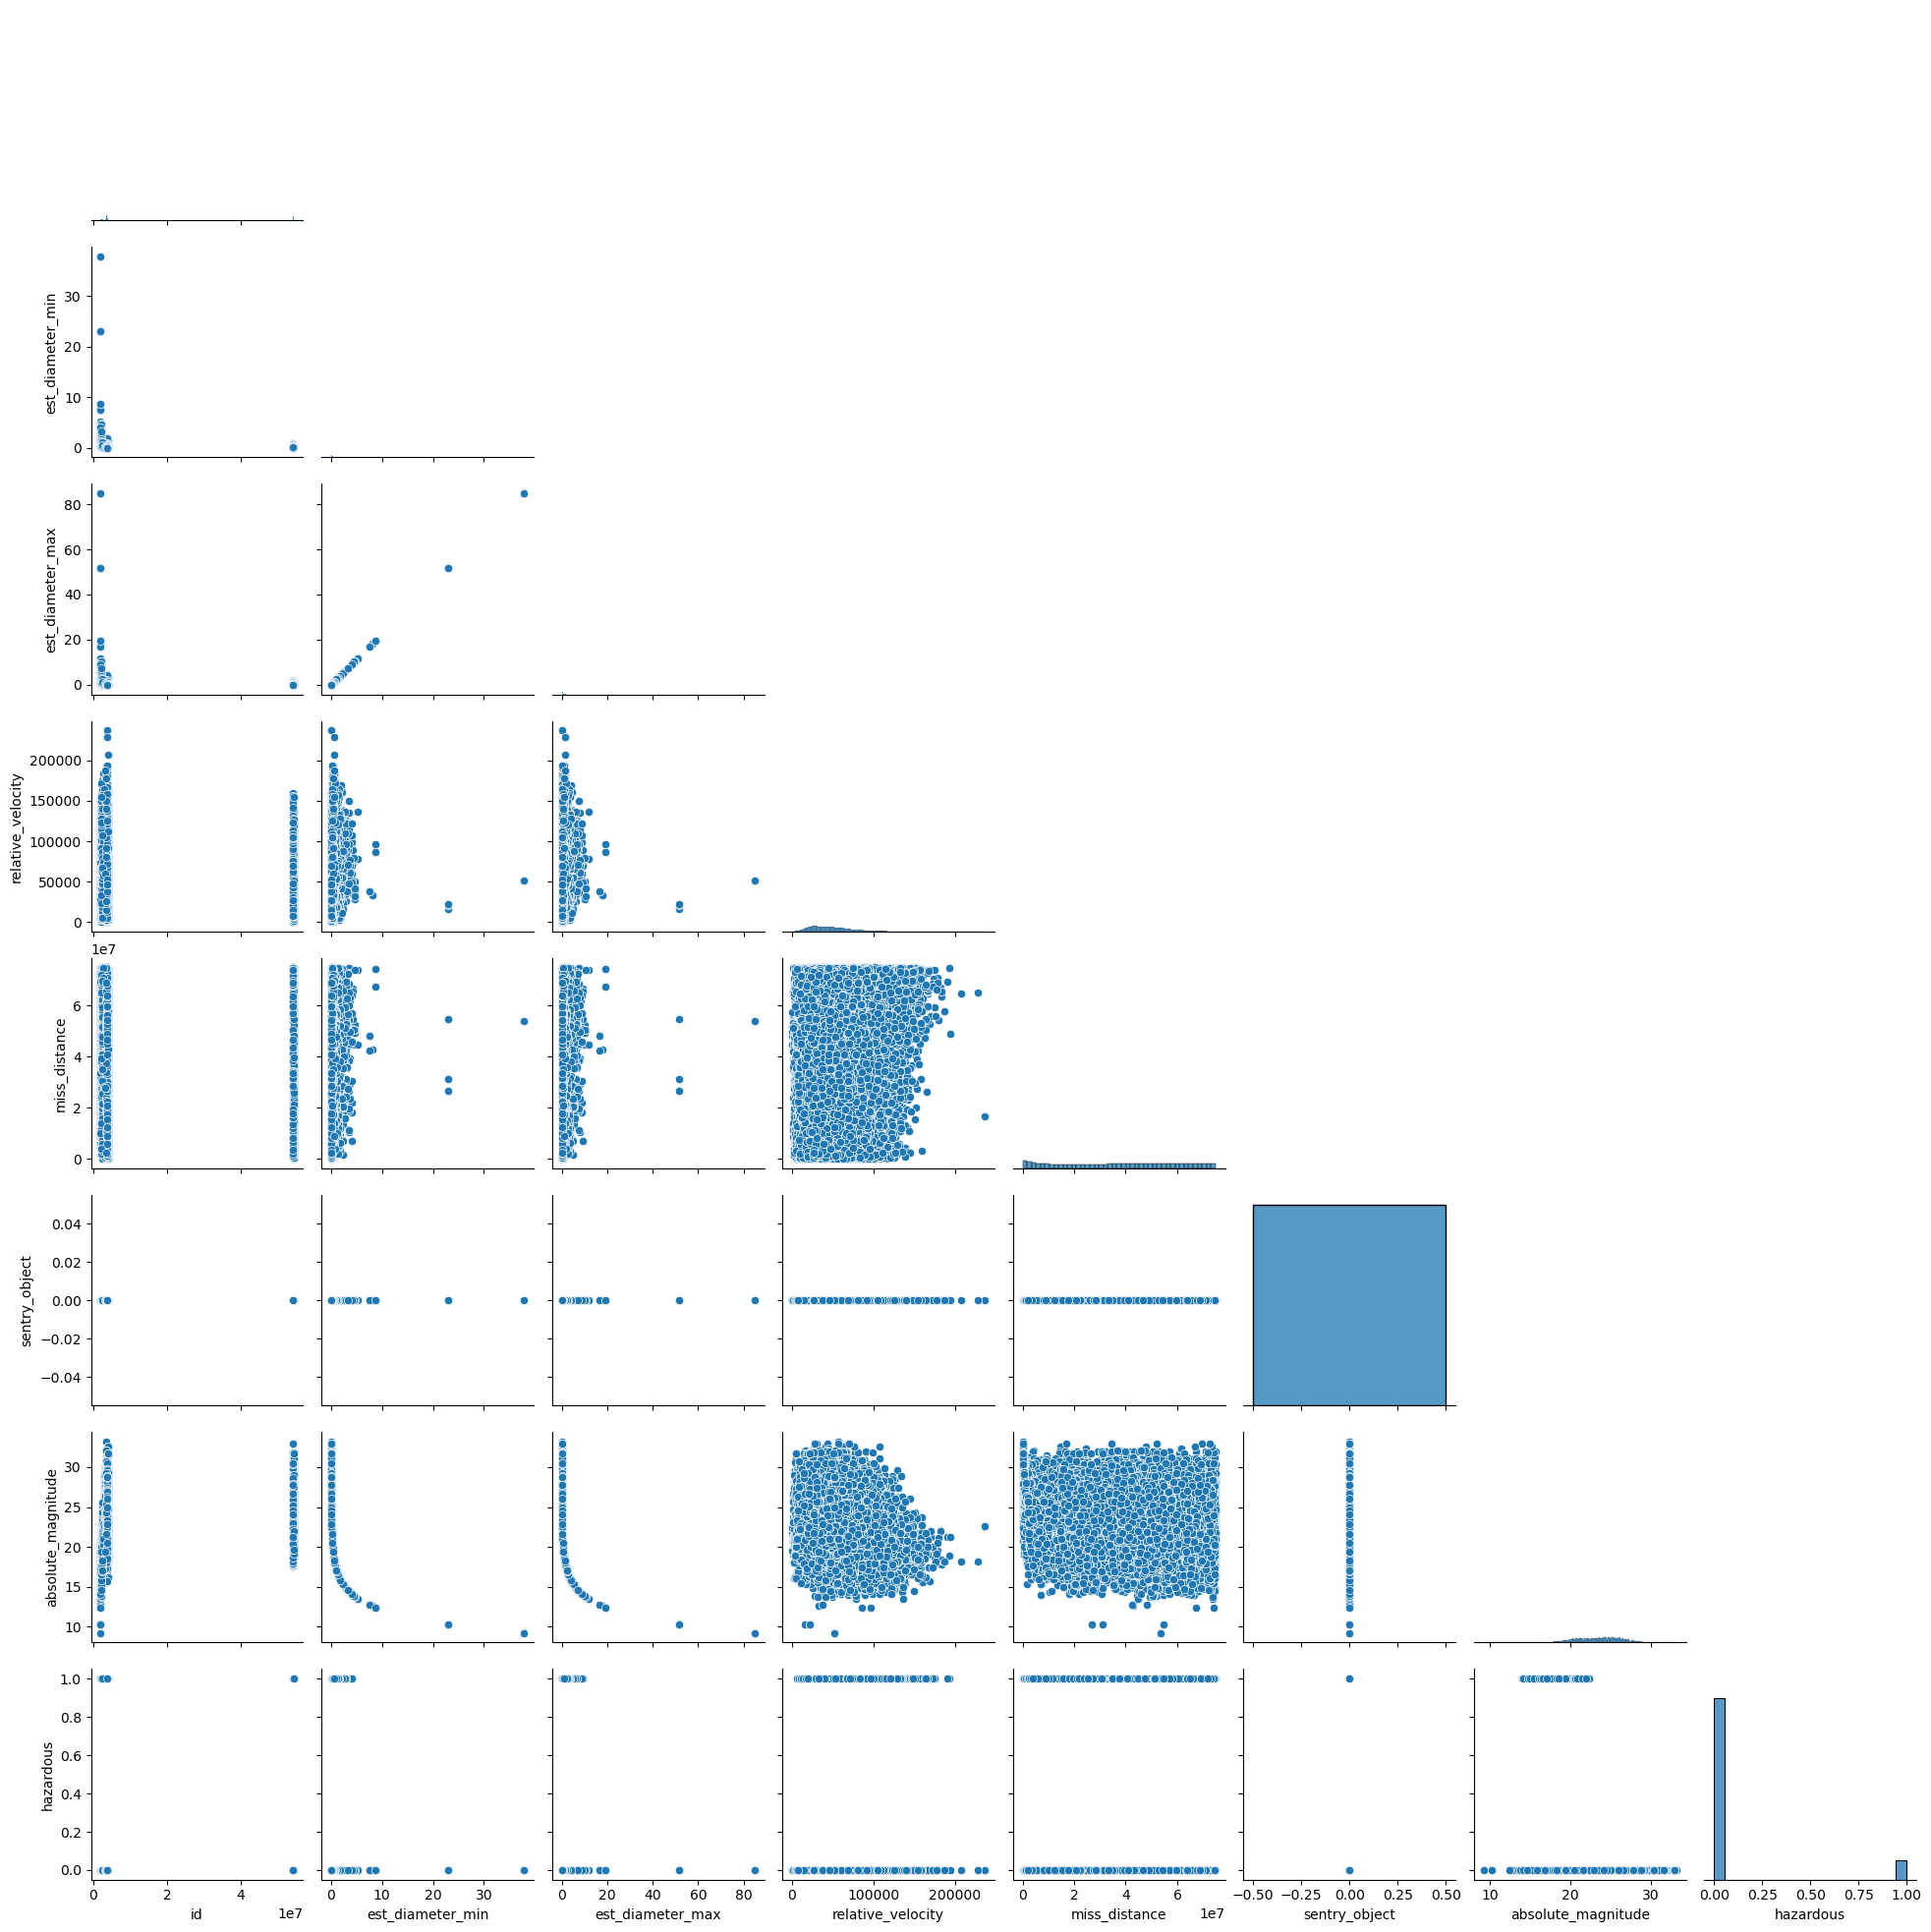

In [22]:
# created a pair plot to identify relationships between variables
sns.pairplot(data=neo, corner=True)

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'est_diameter_min'}>,
        <Axes: title={'center': 'est_diameter_max'}>],
       [<Axes: title={'center': 'relative_velocity'}>,
        <Axes: title={'center': 'miss_distance'}>,
        <Axes: title={'center': 'absolute_magnitude'}>],
       [<Axes: title={'center': 'intercept'}>, <Axes: >, <Axes: >]],
      dtype=object)

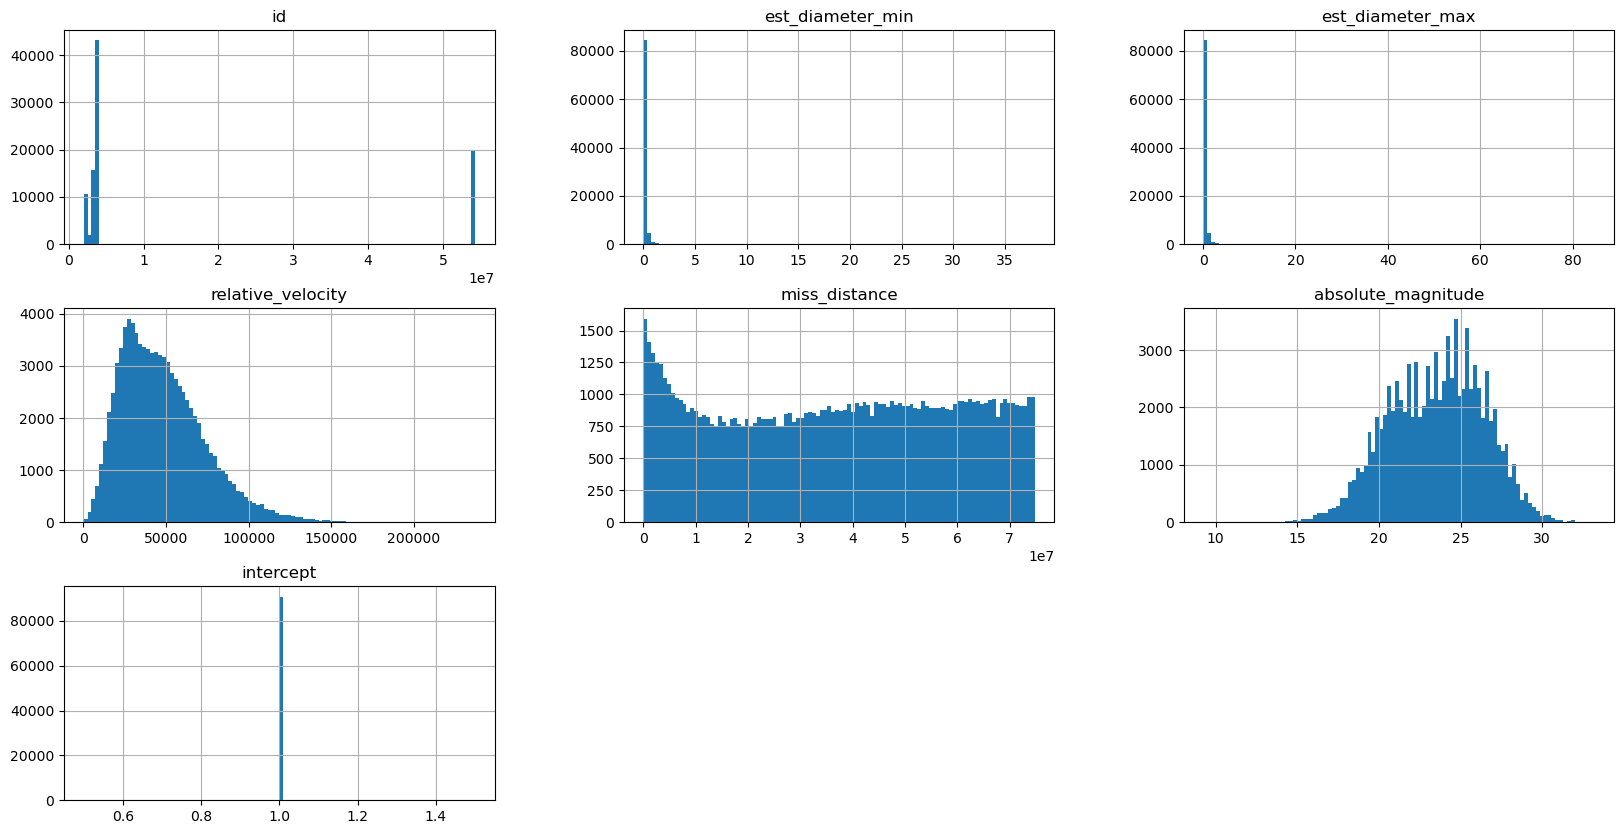

In [63]:
neo.hist(bins=100, figsize = [20, 10])

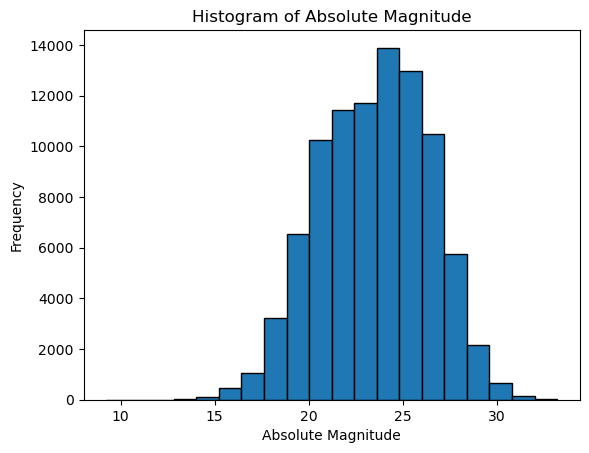

In [34]:
# Plot the histogram for 'absolute_magnitude'
plt.hist(neo['absolute_magnitude'], bins=20, edgecolor='black')  
plt.xlabel('Absolute Magnitude')
plt.ylabel('Frequency')
plt.title('Histogram of Absolute Magnitude')
plt.show()

## Histogram of Numerical Features 

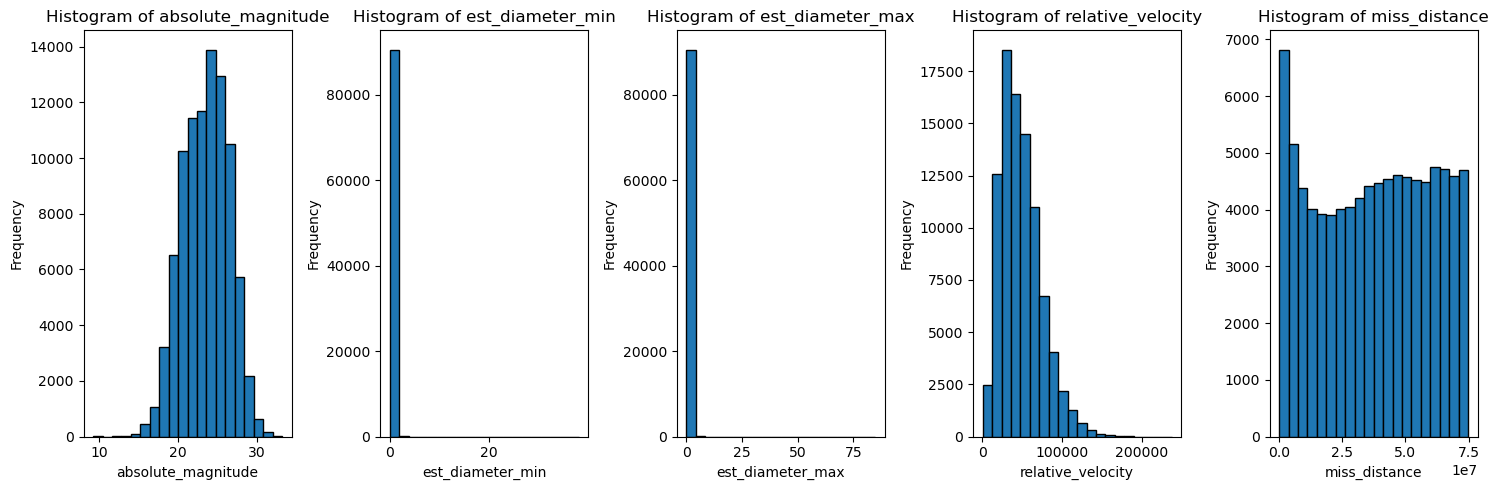

In [40]:
numerical_features = ['absolute_magnitude', 'est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance']

# Create side-by-side histograms using subplots
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_features), figsize=(15, 5))

for i, feature in enumerate(numerical_features):
    axes[i].hist(neo[feature], bins=20, edgecolor='black')
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


# Hypothesis Testing

### Assuming a p-value of 0.05

Shapiro-Wilk Test to Determine Normal Distribution

### Diameter vs Hazardous

In [65]:
# Select estimated diameter for hazardous and non-hazardous NEOs
estimated_diameter_hazardous = neo.loc[neo['hazardous'], 'est_diameter_min']
estimated_diameter_non_hazardous = neo.loc[~neo['hazardous'], 'est_diameter_min']

# Perform Shapiro-Wilk test for normality
_, p_value_hazardous = stats.shapiro(estimated_diameter_hazardous)
_, p_value_non_hazardous = stats.shapiro(estimated_diameter_non_hazardous)

print("Shapiro-Wilk Test (Hazardous): p-value =", p_value_hazardous)
print("Shapiro-Wilk Test (Non-Hazardous): p-value =", p_value_non_hazardous)
# This low p-value indicates they are not normal

Shapiro-Wilk Test (Hazardous): p-value = 0.0
Shapiro-Wilk Test (Non-Hazardous): p-value = 0.0


Mann - Whitney U Test

### Diameter vs Hazardous

In [44]:
# Select estimated diameter for hazardous and non-hazardous NEOs
estimated_diameter_hazardous = neo.loc[neo['hazardous'], 'est_diameter_min']
estimated_diameter_non_hazardous = neo.loc[~neo['hazardous'], 'est_diameter_min']

# Perform Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(estimated_diameter_hazardous, estimated_diameter_non_hazardous, alternative='two-sided')

print("Mann-Whitney U Test - Two-Sided: p-value =", p_value)
# This low p-value indicates a significant difference in the mean estimated diameter between 
# hazardous and non-hazardous NEOs ( I think )

Mann-Whitney U Test - Two-Sided: p-value = 0.0


# Hypothesis Test 2

### Absolute Magnitude vs Hazardous

In [30]:
# Fishers test


# Create a 2x2 contingency table
contingency_table_2x2 = pd.crosstab(neo['absolute_magnitude'] <= neo['absolute_magnitude'].median(),
                                   neo['hazardous'])

# Perform Fisher's exact test
odds_ratio, p_value = stats.fisher_exact(contingency_table_2x2)

# Print the results
print("Odds Ratio:", odds_ratio)
print("p-value:", p_value)



Odds Ratio: inf
p-value: 0.0


Logistic regression for absolute_magnitude vs hazardous

In [27]:
# Add an intercept column to the data
neo['intercept'] = 1

# Define the dependent and independent variables for logistic regression
X = neo[['intercept', 'absolute_magnitude']]
y = neo['hazardous']

# Create and fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the logistic regression summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.247418
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              hazardous   No. Observations:                90836
Model:                          Logit   Df Residuals:                    90834
Method:                           MLE   Df Model:                            1
Date:                Wed, 02 Aug 2023   Pseudo R-squ.:                  0.2248
Time:                        11:25:42   Log-Likelihood:                -22474.
converged:                       True   LL-Null:                       -28990.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept              9.0996      0.114     79.977      0.000       8.877       9.323
absol

In [47]:

# Add an intercept column to the data
neo['intercept'] = 1

# Define the dependent and independent variables for logistic regression
X = neo[['intercept', 'absolute_magnitude']]
y = neo['hazardous']

# Split the data into training and test sets (e.g., 75% training, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create and fit the logistic regression model using the training set
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Print the logistic regression summary
print(result.summary())

# Predict the probabilities using the fitted model and the test set
y_pred_probs = result.predict(X_test)

# Now you can evaluate the model's performance using various metrics
# For example, you can calculate accuracy, precision, recall, F1-score, etc.
# You can also plot the ROC curve to visualize the model's performance

# ... (Further analysis and evaluation)


Optimization terminated successfully.
         Current function value: 0.247094
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              hazardous   No. Observations:                68127
Model:                          Logit   Df Residuals:                    68125
Method:                           MLE   Df Model:                            1
Date:                Wed, 02 Aug 2023   Pseudo R-squ.:                  0.2262
Time:                        14:13:54   Log-Likelihood:                -16834.
converged:                       True   LL-Null:                       -21754.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept              9.1594      0.132     69.472      0.000       8.901       9.418
absol

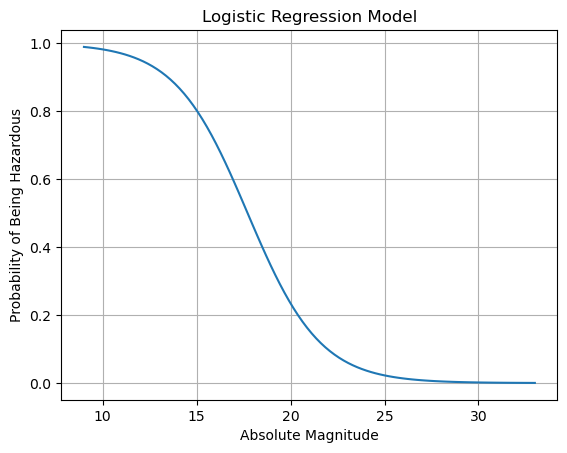

In [48]:
# Graphing the above
# Coefficients and intercept from the logistic regression model
intercept = 9.1594
coefficient = -0.5172

# Absolute magnitudes for plotting
absolute_magnitudes = np.linspace(9, 33, 100)

# Calculate the predicted probabilities using the logistic function
log_odds = intercept + coefficient * absolute_magnitudes
probabilities = 1 / (1 + np.exp(-log_odds))

# Plot the predicted probabilities against absolute magnitudes
plt.plot(absolute_magnitudes, probabilities)
plt.xlabel('Absolute Magnitude')
plt.ylabel('Probability of Being Hazardous')
plt.title('Logistic Regression Model')
plt.grid(True)
plt.show()


In [51]:
# Split the data into features (X) and the target variable (y)
X = neo[['absolute_magnitude']]
y = neo['hazardous']

# Create a logistic regression model
logit_model = LogisticRegression()

# Perform k-fold cross-validation (e.g., k=5)
k = 5
cv_scores = cross_val_score(logit_model, X, y, cv=k, scoring='accuracy')

# Print the cross-validation scores and their mean
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.88237561 0.88958001 0.89480927 0.89646062 0.89981835]
Mean Cross-Validation Score: 0.8926087700159029


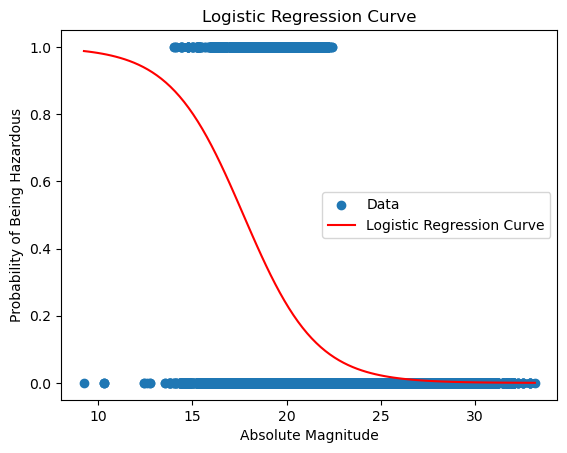

In [52]:

# Plot the logistic regression curve
plt.scatter(X['absolute_magnitude'], y, marker='o', label='Data')
X_pred = np.linspace(X['absolute_magnitude'].min(), X['absolute_magnitude'].max(), 100)
X_pred = sm.add_constant(X_pred)
y_pred = result.predict(X_pred)
plt.plot(X_pred[:, 1], y_pred, color='red', label='Logistic Regression Curve')
plt.xlabel('Absolute Magnitude')
plt.ylabel('Probability of Being Hazardous')
plt.legend()
plt.title('Logistic Regression Curve')
plt.show()